 **IDS PROJECT**
 
 **Group-1**
 
**Sentiment Analysis Classificaiton using Labelled dataset**

In [1]:
import numpy as np
import pandas as pd
import re

# Importing modules for Data visulization
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# Importing all the Classifier Algortihms from the scikit-learn data analysis library
from sklearn.cluster import KMeans 
from sklearn.naive_bayes import GaussianNB as NBClassifier
from sklearn.ensemble import RandomForestClassifier as RFClassifier
from sklearn import tree
from sklearn.svm import SVC as SVMClassifier

# Importing the classifier evaluation modules from the same library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score,precision_score, f1_score, recall_score

# Importing all the tools for data preprocessing 
from bs4 import BeautifulSoup
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import gensim
import nltk
#nltk.download('stopwords') # downloading the stopwords corpus



**Importing the dataset, previewing it and merging the different text files into a single dataset!**

In [2]:
#Importing the dataset chosen from the available datsets for sentiment classification
#The dataset was collected from reviews posted at three different websites

#Importing imdb reviews
imdb = open('/kaggle/input/reviews-labelled-dataset/imdb_labelled.txt').read()

imdb_labels, imdb_texts = [], []
#looping through the text file and seperating each line followed by splitting the
#line into reviews and the corresponding label which are seperated by a tab space
for i, labelled_line in enumerate(imdb.split('\n')): 
    seperated_labelled_line = labelled_line.split('\t')
    if len(seperated_labelled_line) > 1:
        imdb_texts.append(seperated_labelled_line[0])
        imdb_labels.append(seperated_labelled_line[1])

imdb_data_table = pd.DataFrame()

imdb_data_table['text'] = imdb_texts
imdb_data_table['label'] = imdb_labels
imdb_data_table['source'] = 'IMDB'

#Repeating the above process two more times for the other two text files in the datset

#Importing amazon reviews
amazon = open('/kaggle/input/reviews-labelled-dataset/amazon_cells_labelled.txt').read()

amazon_labels, amazon_texts = [], []
for i, labelled_line in enumerate(amazon.split('\n')):
    seperated_labelled_line = labelled_line.split('\t')
    if len(seperated_labelled_line) > 1:
        amazon_texts.append(seperated_labelled_line[0])
        amazon_labels.append(seperated_labelled_line[1])

amazon_data_table = pd.DataFrame()

amazon_data_table['text'] = amazon_texts
amazon_data_table['label'] = amazon_labels
amazon_data_table['source'] = 'Amazon'


#Importing yelp reviews
yelp = open('/kaggle/input/reviews-labelled-dataset/yelp_labelled.txt').read()

yelp_labels, yelp_texts = [], []
for i, labelled_line in enumerate(yelp.split('\n')):
    seperated_labelled_line = labelled_line.split('\t')
    if len(seperated_labelled_line) > 1:
        yelp_texts.append(seperated_labelled_line[0])
        yelp_labels.append(seperated_labelled_line[1])

yelp_data_table = pd.DataFrame()

yelp_data_table['text'] = yelp_texts
yelp_data_table['label'] = yelp_labels
yelp_data_table['source'] = 'Yelp'


# Merging the datasets
mergedDataset = pd.concat([imdb_data_table, amazon_data_table, yelp_data_table], ignore_index=True)
mergedDataset.label = mergedDataset.label.astype(int)
mergedDataset.info()

# Previewing the merged dataset
display(mergedDataset.head())
display(mergedDataset.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3000 non-null   object
 1   label   3000 non-null   int64 
 2   source  3000 non-null   object
dtypes: int64(1), object(2)
memory usage: 70.4+ KB


,text,label,source
0,"A very, very, very slow-moving, aimless movie ...",0,IMDB
1,Not sure who was more lost - the flat characte...,0,IMDB
2,Attempting artiness with black & white and cle...,0,IMDB
3,Very little music or anything to speak of.,0,IMDB
4,The best scene in the movie was when Gerardo i...,1,IMDB


(3000, 3)

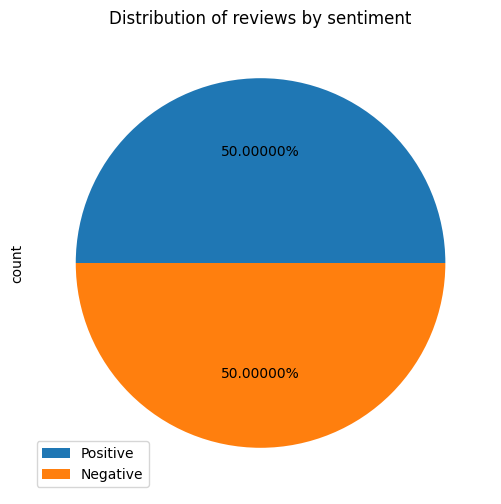

In [3]:
#Visualising the data through a pie chart using the matplotlib library
mergedDataset['label'].value_counts().plot.pie(figsize=(6,6),title="Distribution of reviews by sentiment",labels=['',''],autopct='%1.5f%%')
labels=["Positive","Negative"]
plt.legend(labels,loc=3)
plt.gca().set_aspect('equal')

**Preprocessing and cleaning all the data and visualising the data before and after processing**

In [4]:
#defining a function to preprocess all of our text
def TextPreProcessing(text):
    
  ps=PorterStemmer()
  # removing E-mails
  review_without_emails=re.sub('\b[\w\-.]+?@\w+?\.\w{2,4}\b', " " , text)

  # removing URL's
  review_without_urls=re.sub('(http[s]?\S+)| (\w+\.[A-Z a-z]{2,4}\S*)', " " ,review_without_emails)

  # removing non Alphabets
  review_without_non_alphabets=re.sub("[^a-zA-Z]", " " , review_without_urls)

  # removing Numbers
  preProcessedReviews =re.sub('\d+(\.\d+)?', " " ,review_without_non_alphabets )

  words= preProcessedReviews.lower().split()  # converting all letters into lowercase
  stop=set(stopwords.words("english"))
  #stemming all the words and removing all the stopwords
  meaningful_words=[ps.stem(w) for w in words if not w in stop]
  return (" ".join(meaningful_words))


# an empty list for preProcessedData is created
preProcessedData=[]


# n_reviews stores the total number of reviews.
n_reviews= mergedDataset['text'].size
n_reviews

# we will now clean each review in the merged Dataset using TextPreProcessing function 
# and add them to preProcesedData list
for i in range (0,n_reviews):
  preProcessedData.append(TextPreProcessing(mergedDataset["text"][i]))

#printing random examples from the orginal text
print("Some examples of raw data:\n")
print(mergedDataset["text"][123])
print(mergedDataset["text"][1203])
print(mergedDataset["text"][2468])
print("\n")

#printing random examples from the preprocessed text
print("Some examples of preprocessed data:\n")
print(preProcessedData[123])
print(preProcessedData[1203])
print(preProcessedData[2468])


Some examples of raw data:

I'd advise anyone to go and see it.  
The best electronics of the available FM Transmitters.
Love the margaritas, too!


Some examples of preprocessed data:

advis anyon go see
best electron avail fm transmitt
love margarita


**Preparing the data vectors for ML model training and splitting it into test and training data**

Some examples of data vectors that we converted the sentences into:
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


The bar plot distribution of output labels in the labelled dataset:


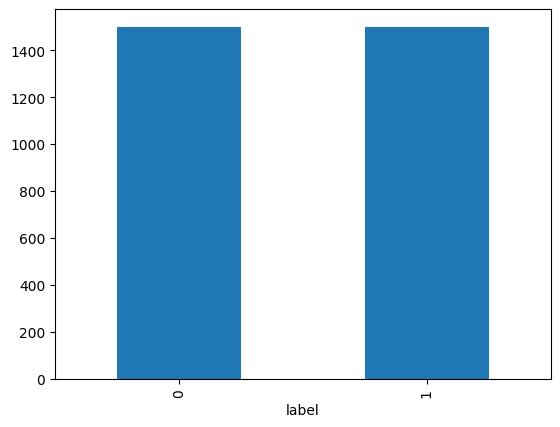

In [5]:
# Using Count Vectorizer to prepare vectors to extract features from text
count_Vector= CountVectorizer()

input_sentences=count_Vector.fit_transform(preProcessedData)
input_sentences=input_sentences.toarray()

 
# checking the input_data array 
print("Some examples of data vectors that we converted the sentences into:")
print(input_sentences[150])
print(input_sentences[1500])
print("\n")

#seeing the output data distribution that is the label distribution once again
output_labels= mergedDataset['label']
output_labels.value_counts()
print("The bar plot distribution of output labels in the labelled dataset:")
output_labels.value_counts().plot.bar()


#Splitting the data into training(80%) and test(20%) data
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split

#calling the train test split fucntion from the sklearn lib and passing the following:
#input sentences
#output labels
#specifying the test data size which is 20 % of data
train_x,test_x,train_y,test_y=train_test_split(input_sentences,output_labels,test_size=0.20,random_state=0)


**Defining a function that evaluates a ML model it is passed and stores all the relevant evaluation scores corresponding to it**

In [6]:
#Creating dictioniers to store all the revelant evalution scores associated with the classifiers
Accuracy= {}
Precision= {}
Recall= {}
F1_score= {}

from seaborn.axisgrid import pairplot
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# function to print and store classification report
def EvaluateModelAndStoreScores(test_y,predicted_y,classifier):
  #calculating all the scores using direct functions from sklearn
  accuracy = accuracy_score(test_y, predicted_y)*100
  precision = precision_score(test_y, predicted_y, average='macro',zero_division=1)
  recall = recall_score(test_y, predicted_y, average='macro')
  f1score =  f1_score(test_y, predicted_y,average='macro')
  
  #adding each score to the dictionary with the corresponding classifier as the key 
  #The below if-else is just formatting of the string to be used as key so as it doesn't overlap
  #when plotting the bar plots later
  if(classifier == 'Support Vector Machine'):
        temp_key = "SVM"
  else:
        temp_key = classifier
  Accuracy[temp_key]=accuracy
  Precision[temp_key]= precision
  Recall[temp_key]= recall
  F1_score[temp_key] = f1score
  
  #printing the Confusion matrix for each test tuple using Heatmaps 
  print("Heatmap (Confusion Matrix):\n")
  #using the seaborn library to create and plot heatmaps
  sb.heatmap(confusion_matrix(test_y,predicted_y),annot=True,fmt='d', cmap="YlGnBu")
  plt.xlabel('Predicted Class')
  plt.ylabel('Actual Class')
  plt.show()
  return accuracy,precision,recall,f1score

**K-Means Classifier**

Heatmap (Confusion Matrix):



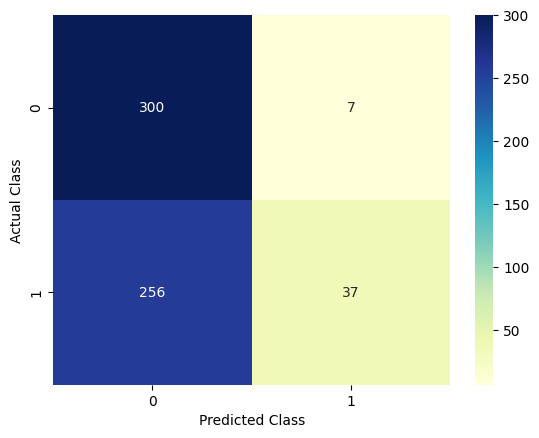


K-Means Classifier metrics are:
Accuracy %= 56.1667, Precision Score = 0.6902, Recall Score = 0.5517 & F1 Score = 0.4574



In [7]:
# Training the K-Means Classifier
KMeans_classifier = KMeans(n_clusters=2, random_state=0, n_init=3)
KMeans_classifier.fit(train_x,train_y)

#Predection of label(predicted_y) corresponding to give input(test_x) using the classifier above
Kmeans_prediction = KMeans_classifier.predict(test_x)

#printing the evalutaion results for the above classifier using the function defined earlier
accuracy,precision,recall,f1score = EvaluateModelAndStoreScores(test_y,Kmeans_prediction,"K-Means")

print("\nK-Means Classifier metrics are:")
print("Accuracy %= {0:.4f}, Precision Score = {1:.4f}, Recall Score = {2:.4f} & F1 Score = {3:.4f}\n".format(accuracy,precision,recall,f1score))

**Naive Bayes Classifier**

Heatmap (Confusion Matrix):



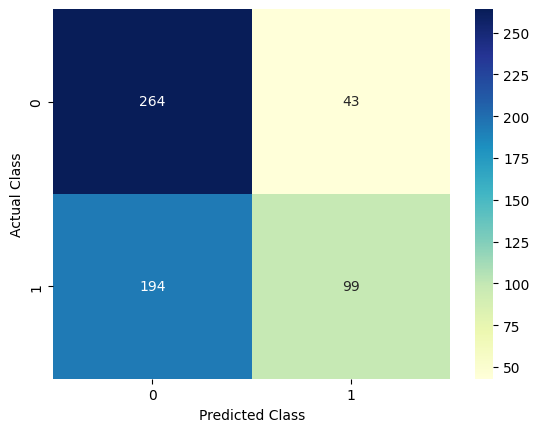


Naive Bayes Classifier metrics are:
Accuracy %= 60.5000, Precision Score = 0.6368, Recall Score = 0.5989 & F1 Score = 0.5727



In [8]:
# Training the Naive Bayes Classifier
NBayes_classifier = NBClassifier()
NBayes_classifier.fit(train_x,train_y)

#Predection of label(predicted_y) corresponding to give input(test_x) using the classifier above
NBayes_prediction = NBayes_classifier.predict(test_x)

#printing the evalutaion results for the above classifier using the function defined earlier
accuracy,precision,recall,f1score = EvaluateModelAndStoreScores(test_y,NBayes_prediction,"NBayes")

print("\nNaive Bayes Classifier metrics are:")
print("Accuracy %= {0:.4f}, Precision Score = {1:.4f}, Recall Score = {2:.4f} & F1 Score = {3:.4f}\n".format(accuracy,precision,recall,f1score))

**Random Forest Classifier**

Heatmap (Confusion Matrix):



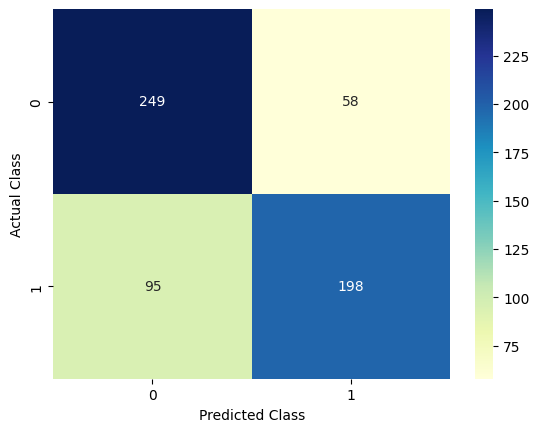


Random Forest Classifier metrics are:
Accuracy %= 74.5000, Precision Score = 0.7486, Recall Score = 0.7434 & F1 Score = 0.7431



In [9]:
# Training the Random Forest Classifier
RandomForest_classifier = RFClassifier(n_estimators=1000,random_state=0)
RandomForest_classifier.fit(train_x,train_y)

#Predection of label(predicted_y) corresponding to give input(test_x) using the classifier above
RandomForest_prediction = RandomForest_classifier.predict(test_x)

#printing the evalutaion results for the above classifier using the function defined earlier
accuracy,precision,recall,f1score = EvaluateModelAndStoreScores(test_y,RandomForest_prediction,"Random Forest")

print("\nRandom Forest Classifier metrics are:")
print("Accuracy %= {0:.4f}, Precision Score = {1:.4f}, Recall Score = {2:.4f} & F1 Score = {3:.4f}\n".format(accuracy,precision,recall,f1score))

**Decision Tree Classifier**

Heatmap (Confusion Matrix):



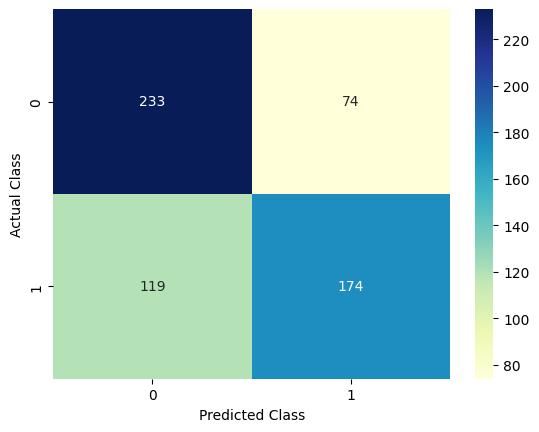


Decision Tree Classifier metrics are:
Accuracy %= 67.8333, Precision Score = 0.6818, Recall Score = 0.6764 & F1 Score = 0.6752



In [10]:
# Training the Decision Tree Classifier
DecisionTree_classifier = tree.DecisionTreeClassifier()
DecisionTree_classifier.fit(train_x,train_y)

#Predection of label(predicted_y) corresponding to give input(test_x) using the classifier above
DecisionTree_prediction = DecisionTree_classifier.predict(test_x)

#printing the evalutaion results for the above classifier using the function defined earlier
accuracy,precision,recall,f1score = EvaluateModelAndStoreScores(test_y,DecisionTree_prediction,"Decision Tree")

print("\nDecision Tree Classifier metrics are:")
print("Accuracy %= {0:.4f}, Precision Score = {1:.4f}, Recall Score = {2:.4f} & F1 Score = {3:.4f}\n".format(accuracy,precision,recall,f1score))

**Support Vector Machines**

Heatmap (Confusion Matrix):



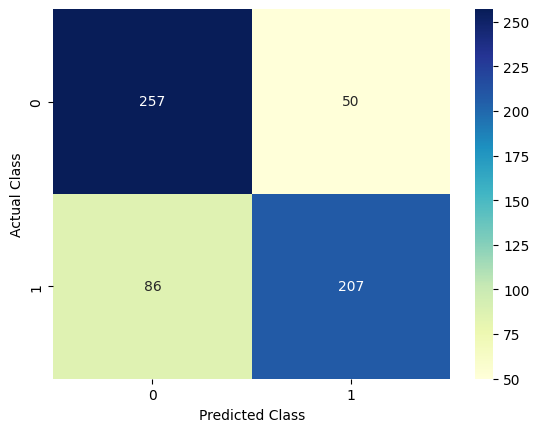


Support Vector Machine Classifier metrics are:
Accuracy %= 77.3333, Precision Score = 0.7774, Recall Score = 0.7718 & F1 Score = 0.7717



In [11]:
# Training the SVM Classifier
SVM_classifier = SVMClassifier(kernel='rbf', random_state = 1)
SVM_classifier.fit(train_x,train_y)

#Predection of label(predicted_y) corresponding to give input(test_x) using the classifier above
SVM_prediction = SVM_classifier.predict(test_x)

#printing the evalutaion results for the above classifier using the function defined earlier
accuracy,precision,recall,f1score = EvaluateModelAndStoreScores(test_y,SVM_prediction,"Support Vector Machine")

print("\nSupport Vector Machine Classifier metrics are:")
print("Accuracy %= {0:.4f}, Precision Score = {1:.4f}, Recall Score = {2:.4f} & F1 Score = {3:.4f}\n".format(accuracy,precision,recall,f1score))

**Defining a function to compare and plot all the different evaluation scores of different classifiers**

In [12]:
def CompareEvaluationScores(score, score_dict):
    if(score == 'Accuracy'): # just formatting the string 'score' to be displayed in the bar plot
        score += '(in %)'
    sb.set_style('darkgrid') # setting bar plot style
    #using the score_dict and making two lists out of it, one with all the keys and other with values
    x = list(score_dict.keys())
    y = list(score_dict.values())
    sb.barplot(x = x, y = y) #creating the barplot using the seaborn library
    
    #formatting the axes and the title of the plot and displaying it
    plt.xlabel("Classifier") 
    plt.ylabel(score) 
    plt.title(score +" of each Classifier") 
    plt.show()

**Using the above function and comparing all the evalution measures of all the classifiers used**

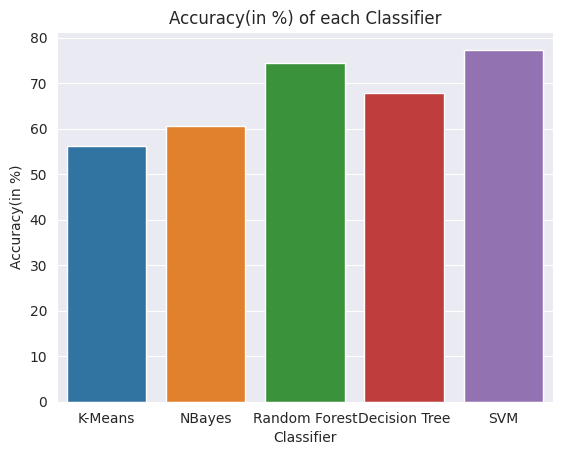

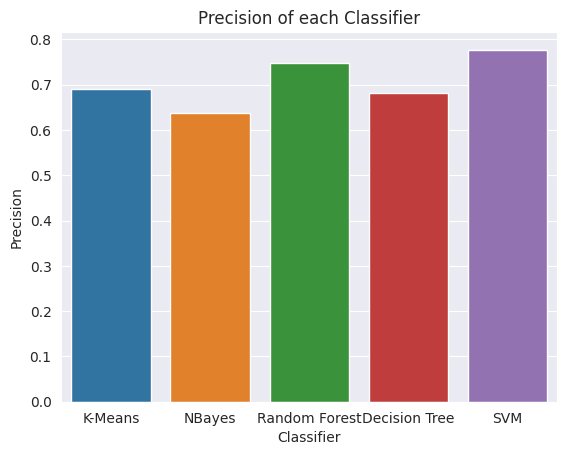

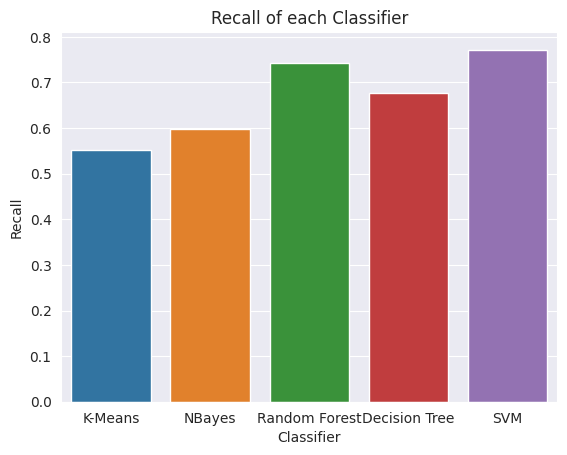

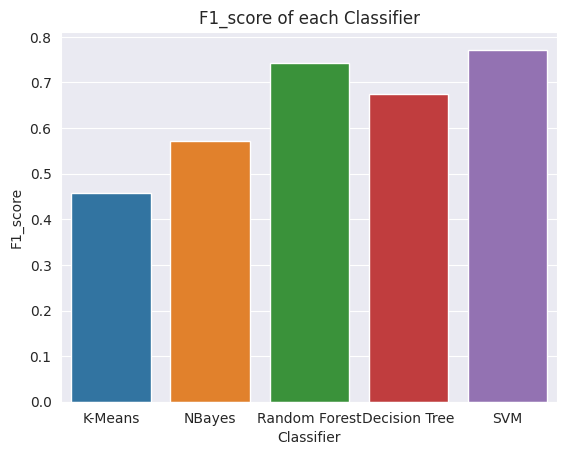

In [13]:
#we call the CompareEvaluationScores we defined previously with each measure one by one to get the 
#barplot corresponding to each score comparing all the classifiers
CompareEvaluationScores("Accuracy", Accuracy)
print("\n")
CompareEvaluationScores("Precision", Precision)
print("\n")
CompareEvaluationScores("Recall", Recall)
print("\n")
CompareEvaluationScores("F1_score", F1_score)